# Decision Tree (Monkeypox Disease Prediction)

## Explanation

### Objective

created a machine learning model that can predict whether a person has monkeypox disease or not, using the Decision Tree algorithm.

### Column Descriptions

- **Patient_ID** = Unique identifier for each patient.
- **Systemic Illness** = The primary systemic symptom exhibited (Fever, Swollen Lymph Nodes, Muscle Aches and Pain, None).
- **Rectal Pain** = Binary feature indicating presence of rectal pain (False / True).
- **Sore Throat** = Binary feature indicating presence of sore throat (False / True).
- **Penile Oedema** = Binary feature indicating presence of penile swelling (False / True).
- **Oral Lesions** = Binary feature indicating presence of lesions in the mouth (False / True).
- **Solitary Lesion** = Binary feature indicating presence of a single lesion (False / True).
- **Swollen Tonsils** = Binary feature indicating swelling of the tonsils (False / True).
- **HIV Infection** = Binary feature indicating if the patient has HIV (False / True).
- **Sexually Transmitted Infection** = Binary feature indicating presence of other STIs (False / True).
- **MonkeyPox** = Target variable indicating if the patient is positive for Monkeypox (Positive, Negative)

## A. Data Preparation

### A.1 Import Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [108]:
try:
    df = pd.read_csv('monkeypox.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [109]:
df.shape

(25000, 11)

### A.4 Viewing Data Informations

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


### A.5 Viewing Data Statistics

In [111]:
df_numeric = df.select_dtypes(include=['bool']).astype(int)
df_numeric.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Rectal Pain,25000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Sore Throat,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Penile Oedema,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Oral Lesions,25000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
Solitary Lesion,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Swollen Tonsils,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
HIV Infection,25000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
Sexually Transmitted Infection,25000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [112]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [113]:
df.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative
24999,P24999,Swollen Lymph Nodes,False,False,True,False,False,True,True,False,Positive


### A.7 Viewing Duplicated Data

In [114]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [115]:
df.isna().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

### A.9 Viewing Outliers Data

#### NO OUTLIERS (Because The Data Is Boolean)

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [116]:
df.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [117]:
df = df.drop(columns=['Patient_ID'])

### B.2 Mapping Features

#### Boolean Mapping

In [118]:
bool_cols = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 
             'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

for col in bool_cols:
    df[col] = df[col].astype(bool).astype(int)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                18784 non-null  object
 1   Rectal Pain                     25000 non-null  int64 
 2   Sore Throat                     25000 non-null  int64 
 3   Penile Oedema                   25000 non-null  int64 
 4   Oral Lesions                    25000 non-null  int64 
 5   Solitary Lesion                 25000 non-null  int64 
 6   Swollen Tonsils                 25000 non-null  int64 
 7   HIV Infection                   25000 non-null  int64 
 8   Sexually Transmitted Infection  25000 non-null  int64 
 9   MonkeyPox                       25000 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.9+ MB


#### Object Mapping

In [120]:
df['Systemic Illness'].unique()

array([nan, 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [121]:
df['Systemic Illness'] = df['Systemic Illness'].fillna("None")

In [122]:
illness_mapping = {"None" : 0, 'Fever' : 1, 'Swollen Lymph Nodes' : 2, 'Muscle Aches and Pain' : 3}
df['Systemic Illness'] = df['Systemic Illness'].map(illness_mapping)

In [123]:
df['Systemic Illness'].unique()

array([0, 1, 2, 3])

### B.3 Mapping Label

In [124]:
monkeypox_mapping = {"Negative" : 0, "Positive" : 1}
df['MonkeyPox'] = df['MonkeyPox'].map(monkeypox_mapping)

In [125]:
df['MonkeyPox'].unique()

array([0, 1])

### B.4 Feature Engineering

#### Creating New Column

Total Symptoms

In [126]:
illness_cols = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 
             'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

df['Total Symptoms'] = df[illness_cols].sum(axis=1)

In [127]:
df.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Total Symptoms
0,0,0,1,1,1,0,1,0,0,0,4
1,1,1,0,1,1,0,0,1,0,1,4
2,1,0,1,1,0,0,0,1,0,1,3
3,0,1,0,0,0,1,1,1,0,1,4
4,2,1,1,1,0,0,1,1,0,1,5


## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

### C.2 Bivariate Analysis

### C.3 Multivariate Analysis

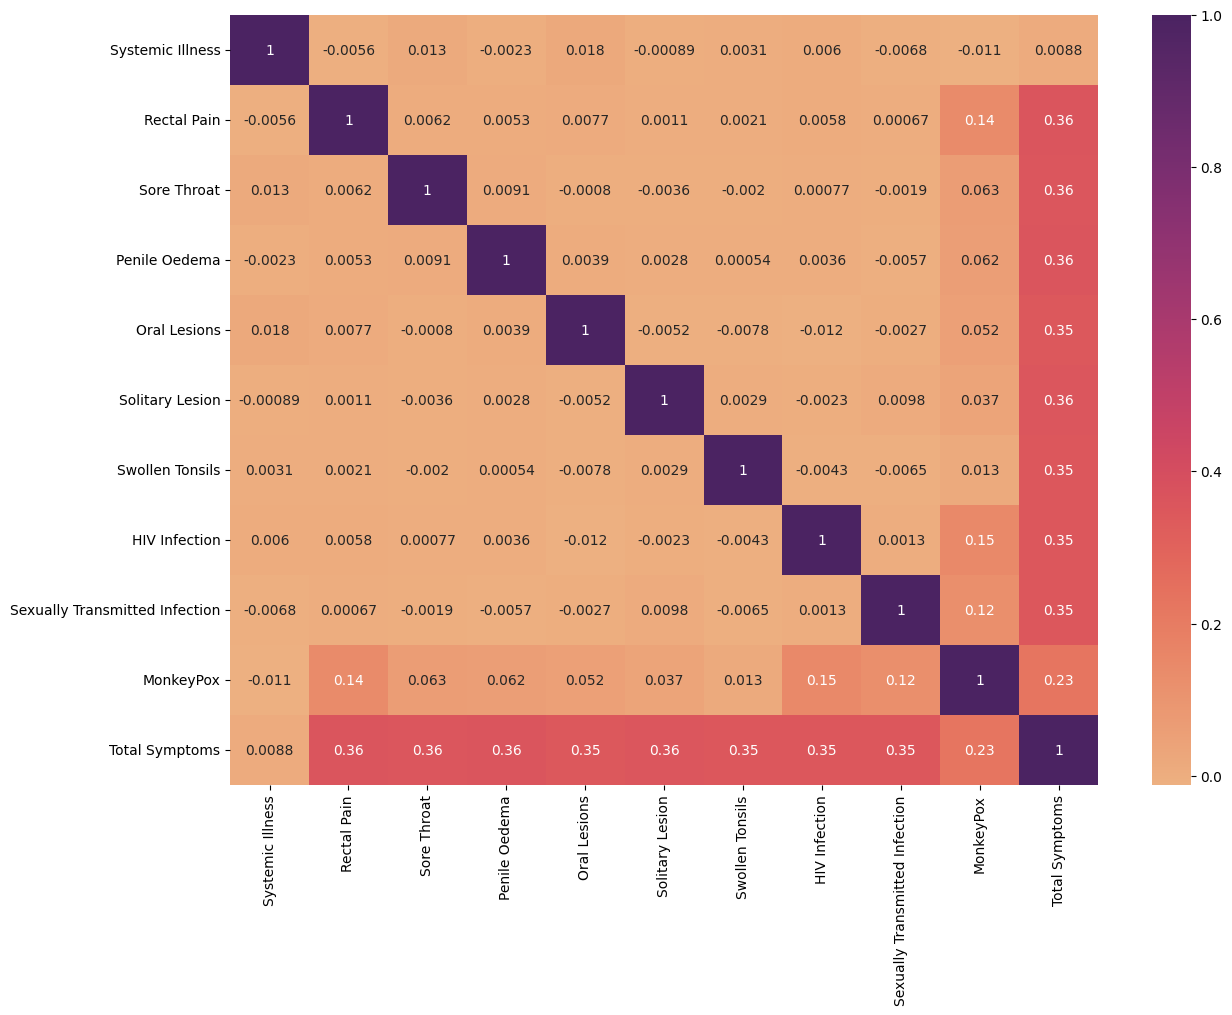

In [128]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='flare')
plt.show()

## D. Modelling

In [129]:
X_data = df.drop(columns=['MonkeyPox'])
y_data = df['MonkeyPox']

In [130]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

In [131]:
def hitung_gini(groups, classes):
    # Hitung total data di split ini
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        # Hindari pembagian dengan nol
        if size == 0:
            continue
        
        score = 0.0
        # Ambil kolom terakhir sebagai target (y)
        # Asumsi: Kolom target ada di posisi paling akhir
        group_y = group.iloc[:, -1]
        
        for class_val in classes:
            # Hitung proporsi (p)
            p = (group_y == class_val).sum() / size
            score += p ** 2
            
        # Rumus Gini: (1 - sum(p^2)) * bobot grup
        gini += (1.0 - score) * (size / n_instances)
        
    return gini

In [132]:
def split_data(df, feat_idx, threshold):
    # feat_idx: urutan kolom (0, 1, 2...)
    # threshold: nilai ambang batas
    
    # Ambil data yang nilainya KURANG DARI threshold (Kiri)
    left = df[df.iloc[:, feat_idx] < threshold]
    
    # Ambil data yang nilainya LEBIH DARI / SAMA DENGAN threshold (Kanan)
    right = df[df.iloc[:, feat_idx] >= threshold]
    
    return left, right

In [133]:
def get_best_split(df, classes):
    best_gini = float('inf') # Angka awal yang besar
    best_split = {} # Dictionary untuk simpan hasil terbaik
    
    # Loop semua kolom fitur (kecuali kolom terakhir target)
    n_features = df.shape[1] - 1
    
    for feat_idx in range(n_features):
        # Loop setiap baris data untuk dijadikan kandidat threshold
        # (Ini cara sederhana, kalau data jutaan akan lambat, tapi buat 800 aman)
        for index, row in df.iterrows():
            
            # Coba split pakai nilai ini
            groups = split_data(df, feat_idx, row.iloc[feat_idx])
            
            # Hitung skor Gini-nya
            gini = hitung_gini(groups, classes)
            
            # Kalau nemu Gini yang lebih kecil (lebih murni), simpan!
            if gini < best_gini:
                best_gini = gini
                best_split = {
                    'feat_idx': feat_idx,
                    'val': row.iloc[feat_idx],
                    'groups': groups
                }
                
    return best_split

In [134]:
# Fungsi bantuan untuk menentukan label mayoritas (voting) di daun
def to_terminal(group):
    # Ambil kolom target (terakhir), cari modus (nilai terbanyak)
    return group.iloc[:, -1].mode()[0]

# Fungsi Rekursif Utama
def build_tree(df, classes, depth, max_depth):
    # 1. Cari split terbaik untuk data saat ini
    root = get_best_split(df, classes)
    
    # Cek apakah ada split yang valid
    if not root: 
        return to_terminal(df)

    # Ambil hasil split kiri dan kanan
    left, right = root['groups']
    del(root['groups']) # Hapus datanya biar hemat memori, kita cuma butuh rules-nya
    
    # 2. Cek Kondisi Berhenti (Stop Conditions)
    # A. Jika salah satu sisi kosong (split gagal memisahkan)
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    # B. Jika kedalaman pohon sudah maksimal
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root

    # 3. Rekursif: Bangun lagi untuk cabang Kiri dan Kanan
    root['left'] = build_tree(left, classes, depth + 1, max_depth)
    root['right'] = build_tree(right, classes, depth + 1, max_depth)
    
    return root

In [135]:
# Prediksi untuk SATU baris data
def predict_row(node, row):
    # Kalau node ini adalah angka (hasil prediksi akhir / Leaf), langsung kembalikan
    if not isinstance(node, dict):
        return node
    
    # Kalau masih dictionary, berarti percabangan. Cek aturannya.
    if row.iloc[node['feat_idx']] < node['val']:
        # Belok Kiri
        return predict_row(node['left'], row)
    else:
        # Belok Kanan
        return predict_row(node['right'], row)

# Prediksi untuk SELURUH data test
def predict_batch(tree, df_test):
    predictions = []
    for index, row in df_test.iterrows():
        prediction = predict_row(tree, row)
        predictions.append(prediction)
    return predictions

PREDIKSI

In [136]:
# Persiapan Data (Gabungkan X_train dan y_train)
train_data = pd.concat([X_train, y_train], axis=1)

# Ambil daftar kelas unik (0.0 dan 1.0)
unique_classes = y_train.unique()

# Membangun Pohon
my_tree = build_tree(train_data, unique_classes, depth=0, max_depth=10)

# Memprediksi
predictions = predict_batch(my_tree, X_test)

KeyboardInterrupt: 

## E. Evaluation